## Linear Regression for Classification

Logistic Regression
- Parameter C를 조정해 과대적합 혹은 과소 적합 문제를 해결
- C(cost function)값이 크면(높은 코스트)--> 훈련을 더 복잡하게 --> 약한 규제
- C 값이 작으면(낮은 코스트)--> 훈련을 덜 복잡하게 --> 강한 규제

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris_dataset = datasets.load_iris()

In [3]:
X = iris_dataset.data[50:,:]
y = iris_dataset.target[50:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=58)

In [4]:
logreg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
logreg001 = LogisticRegression(C = 0.01, solver='lbfgs').fit(X_train, y_train)
logreg100 = LogisticRegression(C = 100, solver='lbfgs').fit(X_train, y_train)

In [5]:
print('logreg cost=1')
print('train data accuracy: {:.3f}'.format(logreg.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(logreg.score(X_test, y_test)))
print('logreg cost=0.01')
print('train data accuracy: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(logreg001.score(X_test, y_test)))
print('logreg cost=100')
print('train data accuracy: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(logreg100.score(X_test, y_test)))

logreg cost=1
train data accuracy: 0.957
test data accuracy: 0.933
logreg cost=0.01
train data accuracy: 0.914
test data accuracy: 0.900
logreg cost=100
train data accuracy: 0.986
test data accuracy: 0.900


In [6]:
logreg.coef_

array([[-0.10421167, -0.26898011,  2.61548484,  2.18239913]])

In [17]:
X_train[0]

array([6.3, 3.3, 4.7, 1.6])

In [18]:
logreg.intercept_

array([-15.09550173])

In [16]:
import numpy as np
np.exp(2.61548484)

13.673844397717172

In [26]:
y_train

array([1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1])

In [40]:
logreg.

'l2'

In [7]:
logreg001.coef_

array([[0.09031487, 0.02262142, 0.19120334, 0.10748758]])

In [8]:
logreg100.coef_

array([[-2.49937944, -0.34743744,  7.12685136, 12.59030785]])

In [22]:
# plt.plot(rdg10.coef_, '^',label = 'alpha=10')
# plt.plot(rdg.coef_, '^',label = 'alpha=1')
# plt.plot(rdg01.coef_, '^',label = 'alpha=0.1')
# plt.plot(lr.coef_, 'o',label = 'Linear Regression')
# plt.xlabel('coef list')
# plt.ylabel('coefficient')
# plt.hlines(0,0,len(lr.coef_))
# plt.legend()
# plt.show()

In [23]:
# odds = np.exp((logreg.coef_.tolist()*X_test[0]).sum() + logreg.intercept_)

In [25]:
result = [logreg.predict(X_test),y_test]
result

[array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 1, 1, 1, 2]),
 array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 1, 1, 1, 2])]

In [26]:
# 7. 적합 결과(예측결과) 보기

logreg_result = pd.DataFrame(result).T

In [27]:
logreg_result.columns = ["prediction", "observation"]

In [28]:
logreg_result['assessment'] =\
logreg_result['prediction'] == logreg_result['observation']
logreg_result

,prediction,observation,assessment
0,1,1,True
1,2,2,True
2,1,1,True
3,1,1,True
4,2,2,True
5,1,1,True
6,2,2,True
7,2,2,True
8,2,2,True
9,1,1,True


In [29]:
logreg_result['assessment1'] = 0

for logi in range(0,len(logreg_result['assessment'])):
    if logreg_result['assessment'][logi] == True:
        logreg_result['assessment1'][logi] = 1
    else: logreg_result['assessment1'][logi] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
logreg_result

,prediction,observation,assessment,assessment1
0,1,1,True,1
1,2,2,True,1
2,1,1,True,1
3,1,1,True,1
4,2,2,True,1
5,1,1,True,1
6,2,2,True,1
7,2,2,True,1
8,2,2,True,1
9,1,1,True,1


In [50]:
pd.value_counts(logreg_result['assessment'].values)
# logreg_result['assessment'].hist()

True     28
False     2
dtype: int64

In [37]:
odds = np.exp(logreg.coef_[0][0]*X_test[:,np.newaxis,0] +\
              logreg.coef_[0][1]*X_test[:,np.newaxis,1] +\
              logreg.coef_[0][2]*X_test[:,np.newaxis,2] +\
              logreg.coef_[0][3]*X_test[:,np.newaxis,3] +\
              logreg.intercept_)

In [38]:
odds[:3]

array([[4.41955969e-03],
       [1.39009939e+01],
       [1.83600715e-01]])

In [39]:
final_values = odds/(1+odds)
final_values[:5]

array([[0.00440011],
       [0.93289038],
       [0.15512048],
       [0.01149223],
       [0.96276223]])

In [40]:
temp = logreg.predict_proba(X_test)

In [41]:
np.round(temp[:,np.newaxis,1],3) == np.round(final_values,3)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

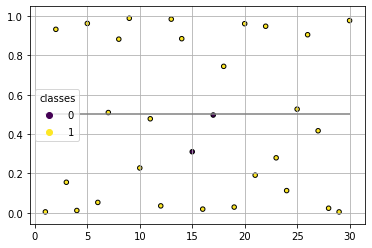

In [42]:
fig, ax = plt.subplots()
scatter = ax.scatter(range(1,31), final_values, edgecolor = 'k',
                    s=20, c=logreg_result['assessment'])
ax.hlines(0.5,30,range(1,31), colors='gray')
ax.legend(*scatter.legend_elements(), loc='best', title='classes')
ax.grid()

## Linear Support Vector

- Parameter C를 조정해 과대적합 혹은 과소적합 문제를 해결
- C(cost function) 값이 크면(높은 코스트)--> 훈련을 더 복잡하게--> 약한규제
- C(cost function) 값이 작으면(낮은 코스트)--> 훈련을 덜 복잡하게--> 강한규제

In [171]:
from sklearn.svm import LinearSVC

In [172]:
X, y = datasets.make_blobs(random_state=42)

In [173]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [174]:
from mlxtend.plotting import category_scatter
import numpy as np
import pandas as pd

In [175]:
df = pd.DataFrame(X, columns=['feature0','feature1'])
df['class'] = y
df.head()

,feature0,feature1,class
0,-7.726421,-8.394957,2
1,5.453396,0.742305,1
2,-2.978672,9.556846,0
3,6.042673,0.571319,1
4,-6.521840,-6.319325,2


In [176]:
# category_scatter(x= 'feature0', y='feature1',label_col='o',data=df)

In [177]:
linear_svm = LinearSVC().fit(X,y)

In [178]:
linear_svm.coef_

array([[-0.17492105,  0.2314109 ],
       [ 0.47621606, -0.06937069],
       [-0.18913922, -0.20400505]])

In [179]:
linear_svm.intercept_

array([-1.07745739,  0.13140544, -0.08604937])

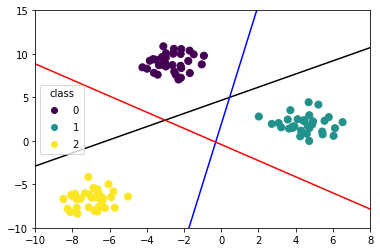

In [185]:
line = np.linspace(-15,10)

fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c = y, s =50)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['k','b','r']):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
ax.set_ylim(-10,15)
ax.set_xlim(-10,8)
ax.legend(*scatter.legend_elements(), loc='best', title='class')

In [186]:
linear_svm.coef_

array([[-0.17492105,  0.2314109 ],
       [ 0.47621606, -0.06937069],
       [-0.18913922, -0.20400505]])

In [187]:
from mlxtend.plotting import plot_decision_regions

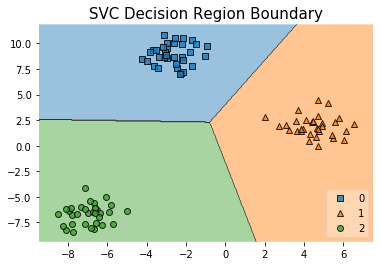

In [193]:
plot_decision_regions(X=X,
                     y=y,
                     clf=linear_svm,
                     legend=4)
plt.title('SVC Decision Region Boundary', size = 15)
plt.show()

In [194]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [195]:
iris = datasets.load_iris()

X = iris.data[:,2:4]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=35)

In [196]:
iris_svm = LinearSVC()

In [197]:
iris_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [200]:
iris_svm.predict(X_test)

array([1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1,
       2])

In [201]:
iris_svm.score(X_test,y_test)

0.8888888888888888

In [202]:
print('train data accuracy: {:.3f}'.format(iris_svm.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(iris_svm.score(X_test, y_test)))

train data accuracy: 0.952
test data accuracy: 0.889


In [223]:
iris_svm10 = LinearSVC(C=10, random_state=10)
iris_svm10.fit(X_train, y_train)
iris_svm10.predict(X_test)
iris_svm10.score(X_test,y_test)

print('train data accuracy: {:.3f}'.format(iris_svm10.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(iris_svm10.score(X_test, y_test)))

train data accuracy: 0.971
test data accuracy: 0.933


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [224]:
iris_svm100 = LinearSVC(C=100, random_state=10)
iris_svm100.fit(X_train, y_train)
iris_svm100.predict(X_test)
iris_svm10.score(X_test,y_test)

print('train data accuracy: {:.3f}'.format(iris_svm100.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(iris_svm100.score(X_test, y_test)))

train data accuracy: 0.924
test data accuracy: 0.911


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## iris_svm cost=10일 때 경계 모습

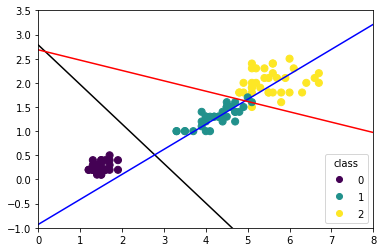

In [226]:
line = np.linspace(0,10)

fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:,0], X_train[:,1], c = y_train, s =50)

for coef, intercept, color in zip(iris_svm10.coef_, iris_svm10.intercept_, ['k','b','r']):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
ax.set_ylim(-1,3.5)
ax.set_xlim(0,8)
ax.legend(*scatter.legend_elements(), loc='best', title='class')

## iris_svm cost=100일 때 경계 모습

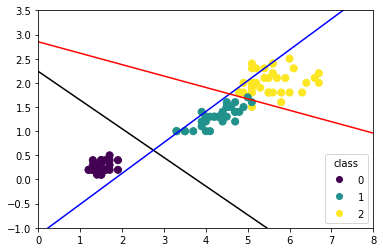

In [234]:
line = np.linspace(0,10)

fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:,0], X_train[:,1], c = y_train, s =50)

for coef, intercept, color in zip(iris_svm100.coef_, iris_svm100.intercept_, ['k','b','r']):
    ax.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
ax.set_ylim(-1,3.5)
ax.set_xlim(0,8)
ax.legend(*scatter.legend_elements(), loc='best', title='class')

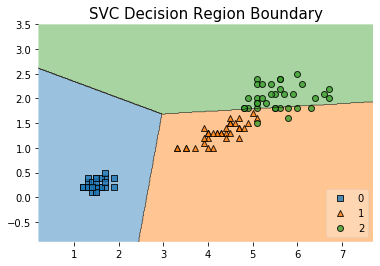

In [236]:
plot_decision_regions(X=X_train,
                     y=y_train,
                     clf=iris_svm100,
                     legend=4)
plt.title('SVC Decision Region Boundary', size = 15)
plt.show()

## SVM (Support Vector Machine)

In [237]:
from sklearn.svm import SVC

In [272]:
X, y = datasets.make_blobs(centers = 4, random_state= 8)
y = y % 2
X[:5,]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772],
       [-1.36579859, -0.3148625 ],
       [-2.66521206, -3.12591651]])

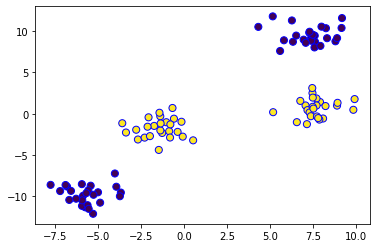

In [242]:
plt.scatter(X[:,0], X[:,1],c=y,s=50, edgecolors='b')

In [264]:
X_new = np.hstack([X, X[:,1:]**2])
X_new[:3,]

array([[-1.72161036, -1.48033142,  2.19138111],
       [-3.6573384 , -9.5482383 , 91.16885455],
       [ 7.0778163 ,  0.99508772,  0.99019957]])

In [245]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Text(0.5, 0, 'feature1 ** 2')

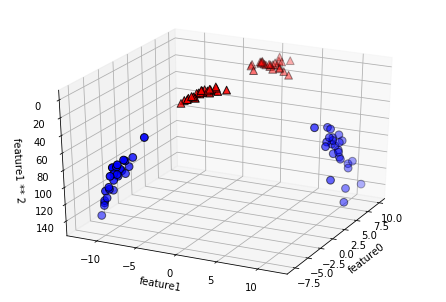

In [284]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26 )
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
          marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

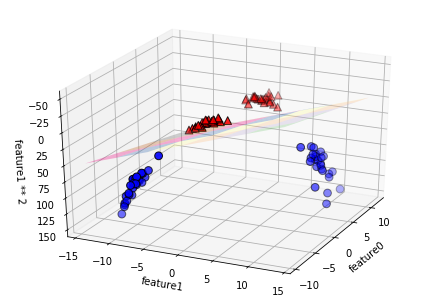

In [303]:
# 그래프 완성

linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정경계

figure = plt.figure()
ax = Axes3D(figure, elev=-152,azim=-25)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY+intercept)/(-coef[2])

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3, color='black',
                    cmap = cm.Accent)
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b',s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c='r',
           marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')


## 커널 기법
- 비선형 특성을 추가하여 선형 모델을 사용할 경우, 특성이 많을 때 연산비용이 증가할 뿐 아니라 데이터가 부정확해질 위험이 있다.
- 수학적 기법을 이용하여 새로운 특성을 임의로 만들지 않고 고차원에서 학습할 수 있다. --> 커널 기법

** 주요 parameter
- gamma : 가우시안 커널의 반경을 결정.
- 감마 값이 크면 커널의 반경이 좁아짐 --> 훈련에 각각의 데이터 포인트를 더욱 반영함 --> 복잡도 증가
- 감마 값이 작으면 커널의 반경이 넒어짐 --> 훈련에 더 넓은 면적에 걸친 데이터 포인트를 반영 --> 복잡도 감소
- C: cost function과 동일

In [304]:
from sklearn.svm import SVC

In [449]:
cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [450]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [451]:
print('train data accuracy: {:.3f}'.format(svc.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(svc.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 0.588


In [452]:
svc_gamma0001 = SVC(gamma=0.001)
svc_gamma0001.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [453]:
print('train data accuracy: {:.3f}'.format(svc_gamma0001.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(svc_gamma0001.score(X_test, y_test)))

train data accuracy: 0.978
test data accuracy: 0.921


## 정규화

Text(0, 0.5, 'value')

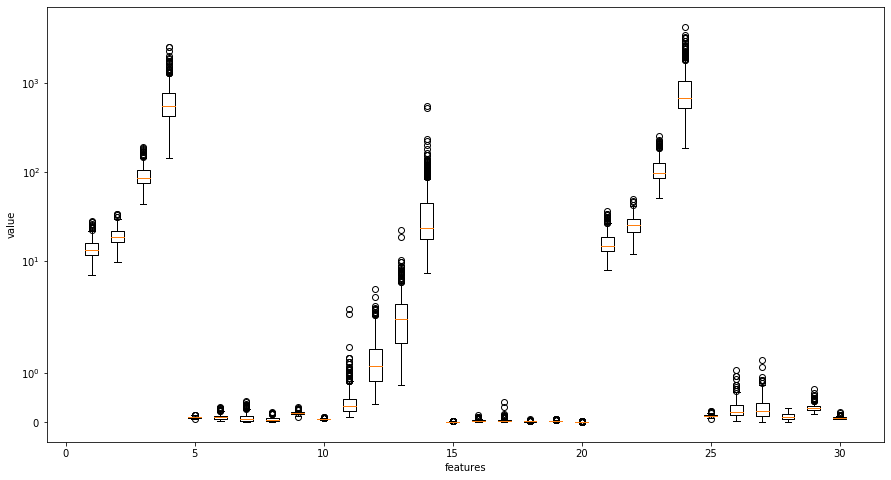

In [454]:
plt.figure(figsize=(15,8))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("features")
plt.ylabel("value")

In [455]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)

X_train_range = X_train_max - X_train_min

X_train_scaled = (X_train-X_train_min)/X_train_range

print("특성별 최소값\n {}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n {}".format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test-X_train_min)/X_train_range

특성별 최소값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [456]:
# X_test_min = X_test.min(axis=0)
# X_test_max = X_test.max(axis=0)

# X_test_range = X_test_max - X_test_min

# X_test_scaled = (X_test-X_test_min)/X_test_range

# print("특성별 최소값\n {}".format(X_test_scaled.min(axis=0)))
# print("특성별 최대값\n {}".format(X_test_scaled.max(axis=0)))

In [457]:
scv_scaled = SVC(gamma='auto').fit(X_train_scaled, y_train)

In [458]:
print("train accuracy : {:.3f}".format(scv_scaled.score(X_train_scaled, y_train)))
print("test accuracy : {:.3f}".format(scv_scaled.score(X_test_scaled, y_test)))

train accuracy : 0.947
test accuracy : 0.956


In [459]:
scv_scaled_gamma1 = SVC(gamma=1).fit(X_train_scaled, y_train)

In [460]:
print("train accuracy : {:.3f}".format(scv_scaled_gamma1.score(X_train_scaled, y_train)))
print("test accuracy : {:.3f}".format(scv_scaled_gamma1.score(X_test_scaled, y_test)))

train accuracy : 0.985
test accuracy : 0.974


## [생각해보기]

데이터의 스케일을 조정할 때, 트레인 세트와 테스트 세트 각각의 min, max 값을 이용하여 별도로 해야할까,

아니면 트레인 세트의 범위를 이용하여 테스트 세트의 정규화 역시 진행해야 할까?

make_blobs()를 이용하여 토이 데이터를 생성하고, 어떤 방식으로 정규화를 진행해야 하는지 분석한 후,

결론을 내려보세요

In [504]:
from sklearn.preprocessing import MinMaxScaler

In [1]:
# 1. Create toy data
X, y = datasets.make_blobs(n_samples = 100, random_state = 4)

# 2. split data
X_train, X_test = train_test_split(X, test_size = 0.2)

# 3. Scaling
# 3-1) apply range of train set
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3-2) use each scaler
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)

X_test_scaled_each = test_scaler.transform(X_test)

# 4. 그래프 작성
fig, axes = plt.subplots(1,3,figsize = (15,4))

# 1번 그래프 : 원본 데이터 (스케일 조정전)
axes[0].scatter(X_train[:,0], X_train[:,1], c='red', label = "train data", s=50)
axes[0].scatter(X_test[:,0], X_test[:,1], c='blue', label = "test data", s=50)
axes[0].legend(loc = 'upper left')
axes[0].set_title("before scaling", size=20)


# 2번 그래프 : 원본 데이터 (스케일 조정전)
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c='red', label = "train data", s=50)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='blue', label = "test data", s=50)
axes[1].set_title("right scaling", size=20)

# 3번 그래프 : 원본 데이터 (스케일 조정전)
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c='red', label = "train data", s=50)
axes[2].scatter(X_test_scaled_each[:,0], X_test_scaled_each[:,1], c='blue', label = "test data", s=50)
axes[2].set_title("wrong scaling", size=20)

for ax in axes:
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")

NameError: name 'datasets' is not defined